In [ ]:
#Explained in https://towardsdatascience.com/lstm-for-google-stock-price-prediction-e35f5cc84165
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
dataset_train = pd.read_csv("/content/Google_Stock_Price_Train.csv")
#keras only takes numpy array
training_set = dataset_train.iloc[:, 1: 2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Dropout
regressor = Sequential()

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

In [ ]:
##add 2nd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

In [ ]:
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = "adam", loss = "mean_squared_error")

In [ ]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
38/38 [==============================] - 13s 19ms/step - loss: 0.0357
Epoch 2/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0062
Epoch 3/100
38/38 [==============================] - 1s 21ms/step - loss: 0.0059
Epoch 4/100
38/38 [==============================] - 1s 27ms/step - loss: 0.0059
Epoch 5/100
38/38 [==============================] - 1s 25ms/step - loss: 0.0057
Epoch 6/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0038
Epoch 11/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 1s 19ms/step - loss: 0.0043
Epoch 13/100
38/38 [====

In [ ]:
dataset_test = pd.read_csv("/content/Google_Stock_Price_Train.csv")
real_stock_price = dataset_test.iloc[:, 1: 2].values

In [ ]:
dataset_total = pd.concat((dataset_train["Open"],dataset_test["Open"]), axis = 0)

In [ ]:
inputs = dataset_total[len(dataset_total)-len(dataset_test)- 60: ].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [ ]:
X_test = []
for i in range(60, len(inputs)): 
    X_test.append(inputs[i-60: i, 0])
X_test = np.array(X_test)
#make numpy array as 3D , adding num of indicator
X_test = np.reshape(X_test, newshape = (X_test.shape[0],  
                        X_test.shape[1], 1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)

40/40 [==============================] - 0s 7ms/step


In [ ]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

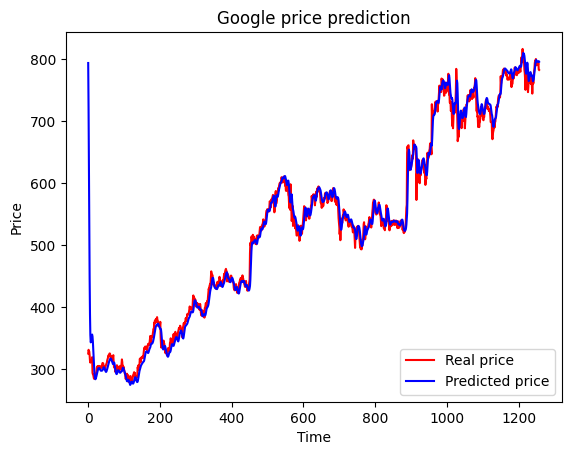

In [ ]:
from matplotlib import pyplot as plt
plt.plot(real_stock_price, color = "red", label = "Real price")
plt.plot(predicted_stock_price, color = "blue", label = "Predicted price")
plt.title("Google price prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Read the CSV file
df = pd.read_csv("forex.csv")

# Extract the features and target variable
features = df.iloc[:, [2, 4, 5]].values  # Columns: open, low, close
currency = df.iloc[:, 6].values  # Column: currency
target = df.iloc[:, 3].values  # Column: high

# Get only the first twenty percent of the dataset
total_rows = df.shape[0]
twenty_percent = int(0.1 * total_rows)

features = features[:twenty_percent]
currency = currency[:twenty_percent]
target = target[:twenty_percent]

# Perform one-hot encoding for the currency column
encoder = OneHotEncoder(sparse=False)
currency_encoded = encoder.fit_transform(currency.reshape(-1, 1))

# Concatenate the features and currency_encoded arrays
features_encoded = np.concatenate((features, currency_encoded), axis=1)

# Feature scaling
sc = MinMaxScaler(feature_range=(0, 1))
features_scaled = sc.fit_transform(features_encoded)
target_scaled = sc.fit_transform(target.reshape(-1, 1))

# Create the input sequences
sequence_length = 60
X_train = []
y_train = []
for i in range(sequence_length, len(features_scaled)):
    X_train.append(features_scaled[i-sequence_length:i, :])
    y_train.append(target_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the input sequences
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# Build the LSTM model
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=30, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=30, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=30, return_sequences=False))
regressor.add(Dropout(rate=0.2))
regressor.add(Dense(units=1))

# Compile and fit the model
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, batch_size=32, epochs=111)

C:\Users\Aun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/5
4539/4539 [==============================] - 266s 57ms/step - loss: 1.6988e-05
Epoch 2/5
4539/4539 [==============================] - 266s 59ms/step - loss: 9.6077e-06
Epoch 3/5
4539/4539 [==============================] - 267s 59ms/step - loss: 9.0037e-06
Epoch 4/5
4539/4539 [==============================] - 268s 59ms/step - loss: 8.5553e-06
Epoch 5/5
4539/4539 [==============================] - 275s 60ms/step - loss: 8.4013e-06


1/1 [==============================] - 0s 29ms/step


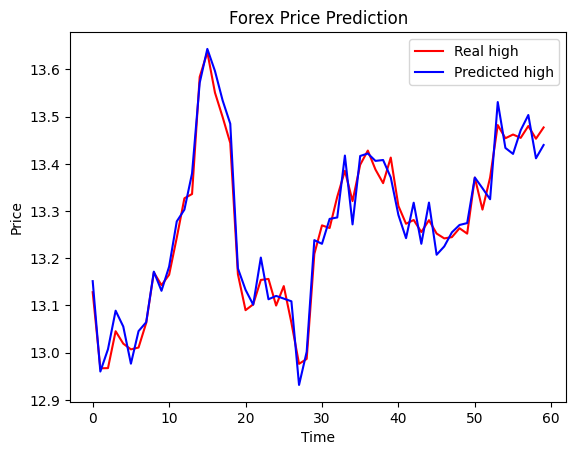

In [23]:
# Prepare the test data (using training data as test data)
test_features = features_scaled
X_test = np.array([test_features[-sequence_length:]])
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Make predictions on the test data (training data)
predicted_scaled = regressor.predict(X_test)
predicted = sc.inverse_transform(predicted_scaled)

# Plot the results
plt.plot(target[-sequence_length:], color='red', label='Real high')
plt.plot(predicted, color='blue', label='Predicted high')
plt.title('Forex Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [22]:
target[-sequence_length:]

array([13.1281, 12.9669, 12.9673, 13.0454, 13.0191, 13.007 , 13.0109,
       13.063 , 13.17  , 13.143 , 13.165 , 13.2435, 13.327 , 13.336 ,
       13.584 , 13.6364, 13.5506, 13.499 , 13.444 , 13.1661, 13.09  ,
       13.1023, 13.154 , 13.1562, 13.0998, 13.141 , 13.0635, 12.9763,
       12.9867, 13.2091, 13.2696, 13.264 , 13.3302, 13.3852, 13.321 ,
       13.398 , 13.428 , 13.3878, 13.359 , 13.4132, 13.3108, 13.273 ,
       13.281 , 13.2555, 13.2806, 13.2523, 13.242 , 13.2447, 13.2635,
       13.2521, 13.3707, 13.303 , 13.371 , 13.482 , 13.4541, 13.462 ,
       13.4549, 13.48  , 13.4531, 13.477 ])

In [21]:
predicted.shape

(1, 1)